In [5]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from toolz import get_config, get_all_config_results

In [7]:
cfg = get_config(file='../config/training_config.json')
df = get_all_config_results(cfg, '../config/algos/pso_param_exp_configs.json')

In [8]:
# Get mean values for each config
mean_by_config = pd.pivot_table(df, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)


In [9]:
def plot_configs(df):
    plt.plot(df.loc['value'], label='fitness')
    plt.plot(df.loc['mdd'])
    plt.plot(df.loc['ret'], label='return')
    plt.xticks(rotation=20)
    plt.xlabel('Configurations', size=14)
    plt.ylabel('Value', size=14)
    plt.title("Average fitness value on test months for 4 currency pairs")
    plt.legend()
    plt.show()

def plot_time(df):
    plt.plot(df.loc['time'])
    plt.xticks(rotation=20)
    plt.xlabel('Configurations', size=14)
    plt.ylabel('Execution time', size=14)
    plt.title("Average exec time on test months for 4 currency pairs")
    plt.legend()
    plt.show()
    
    

## Swarm Size

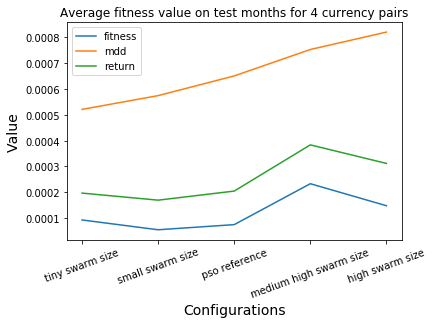

In [10]:
plot_configs(mean_by_config[['tiny swarm size', 'small swarm size', 'pso reference', 'medium high swarm size', 'high swarm size']])

It seems that __as we increase the swarm size, the fitness increases__.

This could be explained by the fact that when we increase the swarm size, we give the algorithm more initial exploratory power, because more particles are spawned randomly on the search space and thus the chance that one of starts with a good fitness is increased. 

Furthermore, increasing the swarm size means that when the particles start to converge to an optimum, they have an increased exploitatory capacity since the higher the number of particles are in an optimum, the more the swarm can explore the optimum. This could also explain why we see a decrease in fitness when the swarm size is very high (`high swarm size`): when the swarm is too large, it exploits an optimum too much, yielding a candidate solution that might be very high in fitness on the training data, but overfits and thus looses fitness on the testing data.

The change in mdd is also interesting. Maybe an increase in mdd means an increase in profit, but strategies that are too high in mdd eventually loose fitness?

## Max Velocity Analysis

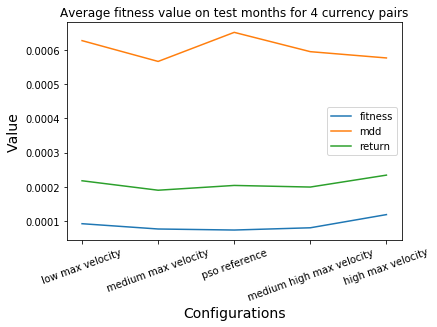

In [11]:
plot_configs(mean_by_config[['low max velocity', 'medium max velocity', 'pso reference', 'medium high max velocity', 'high max velocity']])

It seems that __by increasing max velocity, we get slightly better fitness results__

However, the change seems trivial. We check the values for fitness

In [12]:
mean_by_config[['low max velocity', 'medium max velocity', 'pso reference', 'medium high max velocity', 'high max velocity']].loc[['value', 'ret', 'time']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


config name,low max velocity,medium max velocity,pso reference,medium high max velocity,high max velocity
value,0.000092,0.000077,0.000074,0.000080,0.000119
ret,0.000218,0.000190,0.000204,0.000199,0.000234
time,NaN,NaN,NaN,NaN,NaN


The values are indeed very similar. However we could check if max velocity influences execution time:

In [13]:
plot_time(mean_by_config[['low max velocity', 'medium max velocity', 'pso reference', 'medium high max velocity', 'high max velocity']])

KeyError: 'the label [time] is not in the [index]'

Something went wrong I think during my time recordings. So I could try in the future to time it to see if it makes a difference.

## Inertia weight

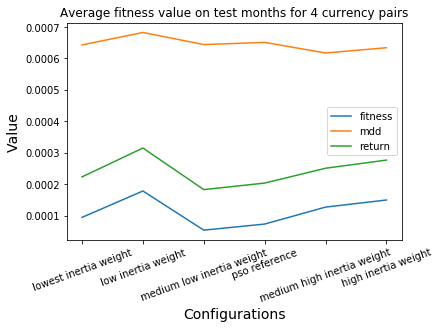

In [14]:
plot_configs(mean_by_config[['lowest inertia weight', 'low inertia weight', 'medium low inertia weight', 'pso reference', 'medium high inertia weight', 'high inertia weight']])

It seems that when the inertia weight is either low or high, we can see an increase in fitness. 

This could be explained by the fact that when the value of the inertia weight is low, our algorithm will favour exploration as the particles will be less inclined to converge. If the weight is too low, we have too little inertia and the particles yield optimums that are not exploited enough.

On the other hand, if our inertia weight is high, our particles will be more inclined to converge faster, and they exploit their optimums better, yielding higher fitness.

I speculated that if the inertia weight was too high, the particles would 'jump around' the search space too much and this would yield lower fitness values but the system seems to cope well (ie the velocity decreases enough over time)


## Memory weight

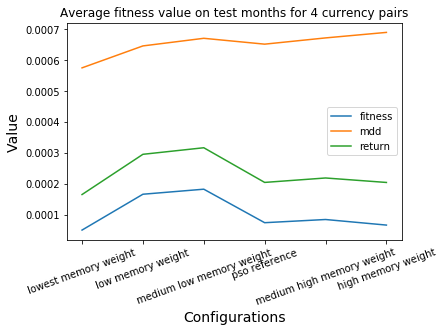

In [15]:
plot_configs(mean_by_config[['lowest memory weight', 'low memory weight', 'medium low memory weight', 'pso reference', 'medium high memory weight', 'high memory weight']])

For the memory weight, it seems that lower weights are more effective. If the weight is too high, the particles don't converge. On the other hand, if the weight is too low, the particles never explore their local surroundings.

## Neighbourhood weight

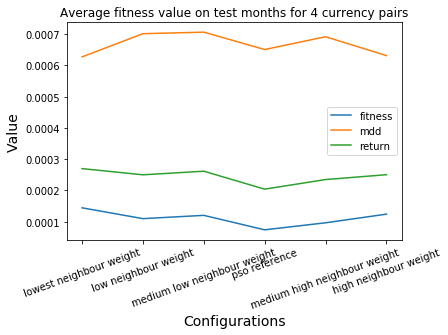

In [16]:
plot_configs(mean_by_config[['lowest neighbour weight', 'low neighbour weight', 'medium low neighbour weight', 'pso reference', 'medium high neighbour weight', 'high neighbour weight']])

In [17]:
mean_by_config[['lowest neighbour weight', 'low neighbour weight', 'medium low neighbour weight', 'pso reference', 'medium high neighbour weight', 'high neighbour weight']].loc[['value', 'mdd', 'ret']]

config name,lowest neighbour weight,low neighbour weight,medium low neighbour weight,pso reference,medium high neighbour weight,high neighbour weight
value,0.000144,0.000110,0.000120,0.000074,0.000096,0.000124
mdd,0.000627,0.000702,0.000707,0.000651,0.000692,0.000631
ret,0.000270,0.000250,0.000261,0.000204,0.000235,0.000250


Changes in neighbourhood weight don't seem too important. The return doesn't seem affected too much.

## K analysis

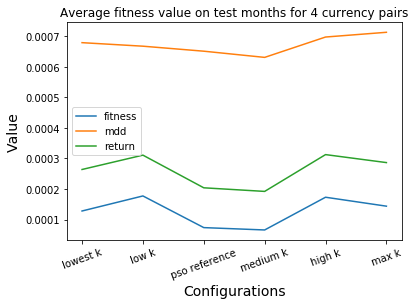

In [18]:
plot_configs(mean_by_config[['lowest k', 'low k', 'pso reference', 'medium k', 'high k', 'max k']])

It seems that __when the value of k is either low or high, we can see an increase in fitness__

My interpretation of these results is that since k is a convergence criterion; when k is too low, we don't converge enough, when k is too high, we converge too much and overfit. Medium values don't perform well because they're neither global enough nor optimal enough.


## Velocity convergence threshold

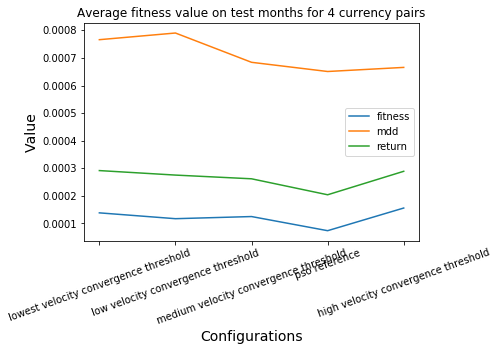

In [19]:
plot_configs(mean_by_config[['lowest velocity convergence threshold', 'low velocity convergence threshold', 'medium velocity convergence threshold', 'pso reference', 'high velocity convergence threshold']])

Same interpretation as k.

## Max iterations

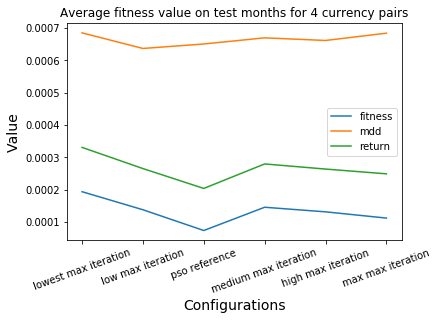

In [20]:
plot_configs(mean_by_config[['lowest max iteration', 'low max iteration', 'pso reference', 'medium max iteration',  'high max iteration', 'max max iteration']])

Same interpretation as k.

# Conclusion

My conclusions are the same as on the previous tests. Having more data allows me to be more assertive on the interpretations. 

To start, I'll use the same configurations as in the first round of analysis, and see their performance on the test data.

First I'll ignore the cheap/expensive aspect to focus on param tuning.

So the proposed configs are:

## Exploratory rush
A big swarm that converges fast. We hope that at least one particle has a good initial fitness.
So high max velocity, high swarm size, high inertia weight, high neighbour weight

## Exploratory 
To favour exploration, we set a low neighbourhood weight, a medium memory weight, a high inertia weight, a low k, a low max iteration

## Exploitatory  
To favour exploitation, we set a high neighbourhood weight, a low memory weight, a medium inertia weight, a high k, a high max iteration

Both configs will have:
A medium high swarm size
A low vel conv threshold

# Testing the proposed configurations


In [21]:
df_c = get_all_config_results(cfg, '../config/algos/pso_configs_2.json')
# Get mean values for each config
mean_by_test_config = pd.pivot_table(df_c, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
mean_by_test_config = mean_by_test_config.join(mean_by_config['pso reference'])
mean_by_test_config

,exploitatory,exploratory,rush,pso reference
mdd,0.000746,0.000861,0.000746,0.000651
no_of_transactions,21.426852,18.541667,19.475000,21.221429
realised_profit,1.218617,1.912381,1.630208,1.020076
ret,0.000244,0.000382,0.000326,0.000204
value,0.000095,0.000210,0.000177,0.000074
wealth,500001.218617,500001.912381,500001.630208,500001.020076


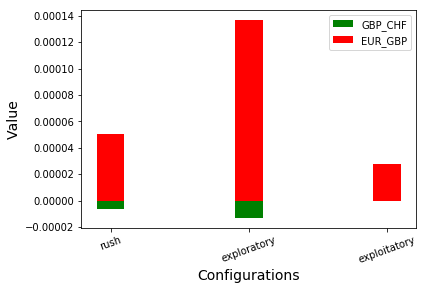

In [22]:
june_gc = df_c.loc[(df_c['data file'].str.contains("GBP_CHF")) & (df_c['month'] == '201306')]
june_gc.set_index('config name', inplace=True)
plt.bar(june_gc.index, june_gc['value'].values,  width=0.2,color='g', label='GBP_CHF', align='center')

june_eg = df_c.loc[(df_c['data file'].str.contains("EUR_GBP")) & (df_c['month'] == '201306')]
june_eg.set_index('config name', inplace=True)
plt.bar(june_gc.index, june_eg['value'].values,width=0.2,color='r', label='EUR_GBP', align='center')


plt.xticks(rotation=20)
plt.xlabel('Configurations', size=14)
plt.ylabel('Value', size=14)
plt.legend()
plt.show()

The exploratory configuration seems to perform very well. I decline it in different configurations to try and optimize it.

In [23]:
mean_by_config.idxmax(axis=1)

mdd                          high swarm size
no_of_transactions         max max iteration
realised_profit       medium high swarm size
ret                   medium high swarm size
value                 medium high swarm size
wealth                medium high swarm size
dtype: object

In [24]:
mean_by_config.sort_values('value', axis=1)

config name,lowest memory weight,small swarm size,medium low inertia weight,high memory weight,medium k,pso reference,medium max velocity,medium high max velocity,medium high memory weight,tiny swarm size,...,high swarm size,high inertia weight,high velocity convergence threshold,low memory weight,high k,low k,low inertia weight,medium low memory weight,lowest max iteration,medium high swarm size
mdd,0.000574,0.000574,0.000644,0.000689,0.000631,0.000651,0.000566,0.000594,0.000671,0.000521,...,0.000821,0.000634,0.000666,0.000645,0.000697,0.000667,0.000682,0.000670,0.000685,0.000753
no_of_transactions,20.994444,24.036111,22.258333,22.208333,21.991667,21.221429,22.232143,21.670238,23.437037,22.824306,...,21.088194,19.720833,21.131481,21.853704,21.016898,20.432672,19.690741,20.606481,20.677083,18.380423
realised_profit,0.824341,0.843860,0.916506,1.019489,0.961332,1.020076,0.950238,0.996525,1.091765,0.980676,...,1.556800,1.384977,1.445595,1.474333,1.563125,1.554240,1.576596,1.580359,1.654814,1.916279
ret,0.000165,0.000169,0.000183,0.000204,0.000192,0.000204,0.000190,0.000199,0.000218,0.000196,...,0.000311,0.000277,0.000289,0.000295,0.000313,0.000311,0.000315,0.000316,0.000331,0.000383
value,0.000050,0.000054,0.000055,0.000066,0.000066,0.000074,0.000077,0.000080,0.000084,0.000092,...,0.000147,0.000150,0.000156,0.000166,0.000173,0.000177,0.000179,0.000182,0.000194,0.000233
wealth,500000.824341,500000.843860,500000.916506,500001.019489,500000.961332,500001.020076,500000.950238,500000.996525,500001.091765,500000.980676,...,500001.556800,500001.384977,500001.445595,500001.474333,500001.563125,500001.554240,500001.576596,500001.580359,500001.654814,500001.916279


Medium high swarm size and exploratory are the best performing on the training data. They share the same parameter except for the number of iterations and weights. The medium high swarm size has the same weight for every param so it seems that what influences fitness is rather the swarm size/vmax/k ratio than the weights.

## Round 3
Results of round 3 of test configs:


In [25]:
df3 = get_all_config_results(cfg, '../config/algos/pso_configs_3.json')
df_c = get_all_config_results(cfg, '../config/algos/pso_configs_2.json')

mean_by_config_3 = pd.pivot_table(df3, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
mean_by_config = mean_by_config.join(mean_by_config_3)
mean_by_config.sort_values('value', axis=1)

config name,lowest memory weight,small swarm size,medium low inertia weight,high memory weight,medium k,pso reference,medium max velocity,medium high max velocity,medium high memory weight,tiny swarm size,...,exploratory 6,medium high swarm size 4,exploratory 1,exploratory 2,lowest max iteration,exploratory 3,medium high swarm size,medium high swarm size 2,medium high swarm size 1,exploratory 4
mdd,0.000574,0.000574,0.000644,0.000689,0.000631,0.000651,0.000566,0.000594,0.000671,0.000521,...,0.000744,0.000710,0.000794,0.000795,0.000685,0.000829,0.000753,0.000693,0.000737,0.000820
no_of_transactions,20.994444,24.036111,22.258333,22.208333,21.991667,21.221429,22.232143,21.670238,23.437037,22.824306,...,20.925000,19.822619,16.846296,19.256481,20.677083,17.252778,18.380423,19.622222,19.158333,16.785317
realised_profit,0.824341,0.843860,0.916506,1.019489,0.961332,1.020076,0.950238,0.996525,1.091765,0.980676,...,1.665339,1.643033,1.740798,1.751922,1.654814,1.991195,1.916279,1.868446,1.923701,2.120958
ret,0.000165,0.000169,0.000183,0.000204,0.000192,0.000204,0.000190,0.000199,0.000218,0.000196,...,0.000333,0.000329,0.000348,0.000350,0.000331,0.000398,0.000383,0.000374,0.000385,0.000424
value,0.000050,0.000054,0.000055,0.000066,0.000066,0.000074,0.000077,0.000080,0.000084,0.000092,...,0.000184,0.000187,0.000189,0.000191,0.000194,0.000232,0.000233,0.000235,0.000237,0.000260
wealth,500000.824341,500000.843860,500000.916506,500001.019489,500000.961332,500001.020076,500000.950238,500000.996525,500001.091765,500000.980676,...,500001.665339,500001.643033,500001.740798,500001.751922,500001.654814,500001.991195,500001.916279,500001.868446,500001.923701,500002.120958


## Friedman test
Export to file in order to friedman test

In [26]:
df3 = get_all_config_results(cfg, '../config/algos/pso_configs_3.json')
df2 = get_all_config_results(cfg, '../config/algos/pso_configs_2.json')
df = get_all_config_results(cfg, '../config/algos/pso_param_exp_configs.json')
all_configs = pd.concat([df, df2, df3])

In [27]:
all_meaned_configs = pd.pivot_table(all_configs, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
all_meaned_configs.sort_values('value', axis=1)

config name,lowest memory weight,small swarm size,medium low inertia weight,high memory weight,medium k,pso reference,medium max velocity,medium high max velocity,medium high memory weight,tiny swarm size,...,medium high swarm size 4,exploratory 1,exploratory 2,lowest max iteration,exploratory,exploratory 3,medium high swarm size,medium high swarm size 2,medium high swarm size 1,exploratory 4
mdd,0.000574,0.000574,0.000644,0.000689,0.000631,0.000651,0.000566,0.000594,0.000671,0.000521,...,0.000710,0.000794,0.000795,0.000685,0.000861,0.000829,0.000753,0.000693,0.000737,0.000820
no_of_transactions,20.994444,24.036111,22.258333,22.208333,21.991667,21.221429,22.232143,21.670238,23.437037,22.824306,...,19.822619,16.846296,19.256481,20.677083,18.541667,17.252778,18.380423,19.622222,19.158333,16.785317
realised_profit,0.824341,0.843860,0.916506,1.019489,0.961332,1.020076,0.950238,0.996525,1.091765,0.980676,...,1.643033,1.740798,1.751922,1.654814,1.912381,1.991195,1.916279,1.868446,1.923701,2.120958
ret,0.000165,0.000169,0.000183,0.000204,0.000192,0.000204,0.000190,0.000199,0.000218,0.000196,...,0.000329,0.000348,0.000350,0.000331,0.000382,0.000398,0.000383,0.000374,0.000385,0.000424
value,0.000050,0.000054,0.000055,0.000066,0.000066,0.000074,0.000077,0.000080,0.000084,0.000092,...,0.000187,0.000189,0.000191,0.000194,0.000210,0.000232,0.000233,0.000235,0.000237,0.000260
wealth,500000.824341,500000.843860,500000.916506,500001.019489,500000.961332,500001.020076,500000.950238,500000.996525,500001.091765,500000.980676,...,500001.643033,500001.740798,500001.751922,500001.654814,500001.912381,500001.991195,500001.916279,500001.868446,500001.923701,500002.120958


In [28]:
bests = all_configs.loc[all_configs['config name'].isin(['exploratory 4', 'medium high swarm size 1', 'medium high swarm size 2', 'medium high swarm size', 'exploratory 3', 'exploratory', 'lowest max iteration', 'exploratory 2', 'exploratory 1', 'medium high swarm size 4' ])]

In [29]:
ndf = bests[['data file', 'config name', 'value']]
ndf = ndf.pivot_table(index='data file', columns='config name', values='value')
ndf.to_csv('../tests/friedman_particles.csv', sep=',')

In [30]:
len(all_meaned_configs.columns)

51

In [31]:
bests.to_csv('../results/best_particles.csv', sep=',')

In [32]:
best_meaned_configs = pd.pivot_table(bests, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
best_meaned_configs.to_csv('../results/best_meaned_particles.csv', sep=',')

# Friedman test results
The friedman statistical test ranked the ```exploratory 1``` as being the best strategy. I feel like there is a big disparity between exploratory 1 and exploratory 4 in terms of avg return in the test data.
The p-value was 0.7360415692660789 which is very high: it means that we have a 23% certainty that e1 outperforms e4

I analyse the two strategies:

In [33]:
e1 = all_configs.loc[all_configs['config name'] == 'exploratory 1']
e4 = all_configs.loc[all_configs['config name'] == 'exploratory 4']
e4_EUR_GBP = e4.loc[e4['data file'].str.contains('EUR_GBP')].set_index('month').mean()
e1_EUR_GBP = e1.loc[e1['data file'].str.contains('EUR_GBP')].set_index('month').mean()
e4_GBP_CHF = e4.loc[e4['data file'].str.contains('GBP_CHF')].set_index('month').mean()
e1_GBP_CHF = e1.loc[e1['data file'].str.contains('GBP_CHF')].set_index('month').mean()
e4_EUR_USD = e4.loc[e4['data file'].str.contains('EUR_USD')].set_index('month').mean()
e1_EUR_USD = e1.loc[e1['data file'].str.contains('EUR_USD')].set_index('month').mean()
e4_GBP_USD = e4.loc[e4['data file'].str.contains('GBP_USD')].set_index('month').mean()
e1_GBP_USD = e1.loc[e1['data file'].str.contains('GBP_USD')].set_index('month').mean()
vals = pd.DataFrame(index=['e4', 'e1'], columns=['EUR_GBP', 'GBP_CHF', 'EUR_USD', 'GBP_USD'])
vals.loc['e4'] = [e4_EUR_GBP['value'], e4_GBP_CHF['value'], e4_EUR_USD['value'], e4_GBP_USD['value']]
vals.loc['e1'] = [e1_EUR_GBP['value'], e1_GBP_CHF['value'], e1_EUR_USD['value'], e1_GBP_USD['value']]

mdds = pd.DataFrame(index=['e4', 'e1'], columns=['EUR_GBP', 'GBP_CHF', 'EUR_USD', 'GBP_USD'])
mdds.loc['e4'] = [e4_EUR_GBP['mdd'], e4_GBP_CHF['mdd'], e4_EUR_USD['mdd'], e4_GBP_USD['mdd']]
mdds.loc['e1'] = [e1_EUR_GBP['mdd'], e1_GBP_CHF['mdd'], e1_EUR_USD['mdd'], e1_GBP_USD['mdd']]

rets = pd.DataFrame(index=['e4', 'e1'], columns=['EUR_GBP', 'GBP_CHF', 'EUR_USD', 'GBP_USD'])
rets.loc['e4'] = [e4_EUR_GBP['ret'], e4_GBP_CHF['ret'], e4_EUR_USD['ret'], e4_GBP_USD['ret']]
rets.loc['e1'] = [e1_EUR_GBP['ret'], e1_GBP_CHF['ret'], e1_EUR_USD['ret'], e1_GBP_USD['ret']]

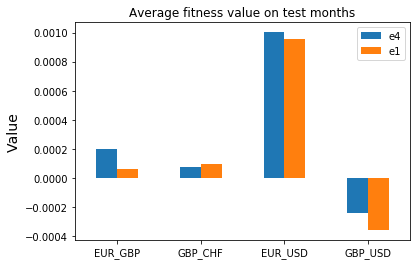

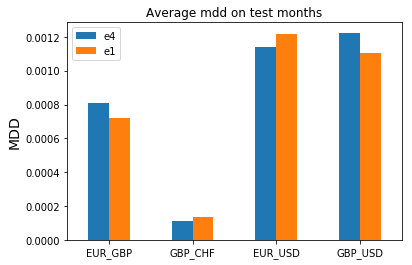

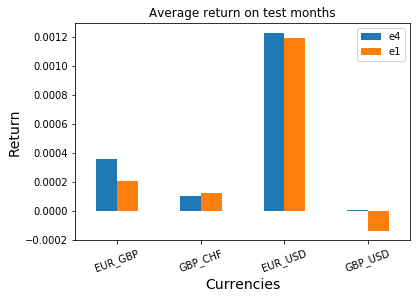

In [34]:
vals.transpose().plot.bar(rot=0)
plt.title("Average fitness value on test months")
plt.ylabel('Value', size=14)

mdds.transpose().plot.bar(rot=0)
plt.title("Average mdd on test months")
plt.ylabel('MDD', size=14)

rets.transpose().plot.bar(rot=0)
plt.title("Average return on test months")
plt.ylabel('Return', size=14)

plt.xticks(rotation=20)
plt.xlabel('Currencies', size=14)
plt.legend()
plt.show()

With these graphs, we can see that e4 seems more advantageous.

    - It yields better fitness on 3 out of 4 currency pairs.
    - Its mdd is not necessarily always higher
    - It yields profitable return on all currency pairs.

In [159]:
rets.loc['e4']['GBP_USD']

7.967419954646316e-06